In [2]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

import shapely.geometry as geom

In [17]:
# makes hex centers for the specified bounding box and number of rows
def make_centers(xmin=-180, xmax=180, ymin=-85, ymax=85, nrows=10):
    row_spacing = (ymax - ymin) / nrows
    col_spacing = 2 / math.sqrt(3) * row_spacing
    ncols = (xmax - xmin) / col_spacing
    x = ([(c + 0.25) * col_spacing + xmin for c in range(int(ncols))] 
     + [(c + 0.75) * col_spacing + xmin for c in range(int(ncols))]) * int(nrows / 2)
    y = [(r + 0.5) * row_spacing + ymin for r in range(int(nrows))] * int(ncols)
    y.sort()
    return (x, y)

# makes hexagons returning a list of shapely.geometry.polygon.Polygons
# first calls make_centers to determine hexagon centers 
def make_hexes(xmin=-175, xmax=175, ymin=-85, ymax=85, nrows=10):
    centers = make_centers(xmin, xmax, ymin, ymax, nrows)
    radius = (centers[0][1] - centers[0][0]) / math.sqrt(3)
    hexes = []
    for (x, y) in zip(centers[0], centers[1]):
        this_hex = []
        for theta in [(1/6 + i/3) * math.pi for i in range(6)]:
            this_hex.append((x + radius * math.cos(theta), y + radius * math.sin(theta)))
        hexes.append(geom.polygon.Polygon(this_hex))
    return hexes


In [18]:
import geopandas as gpd

In [26]:
hexes = make_hexes(nrows=20)

hexbins = gp.GeoDataFrame(geometry=hexes)
hexbins.crs = {'init': 'epsg:4326', 'no_defs': True}

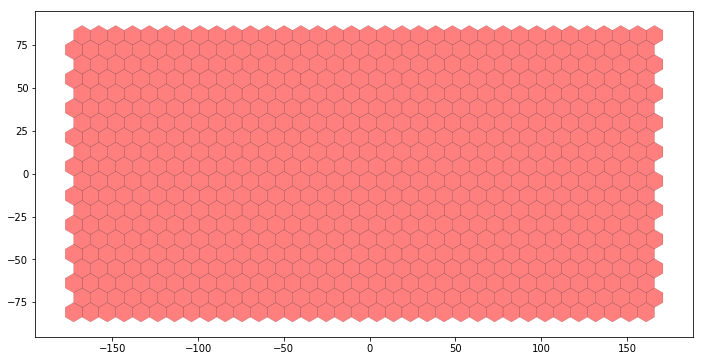

In [27]:
hexbins.plot(linewidth=0.1, facecolor='r', figsize=(12,6))

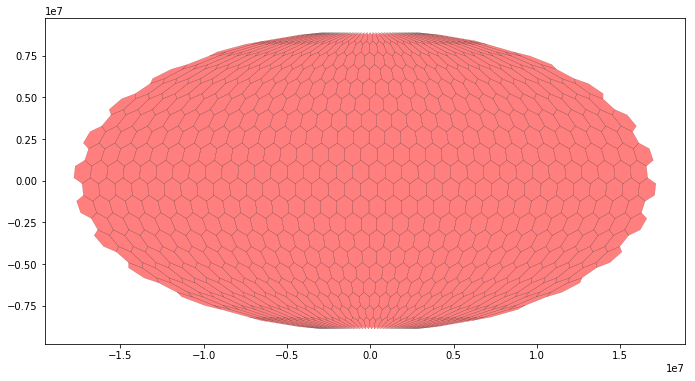

In [28]:
hexbins_ea = hexbins.to_crs("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")
hexbins_ea.plot(linewidth=0.1, facecolor='r', figsize=(12,6))

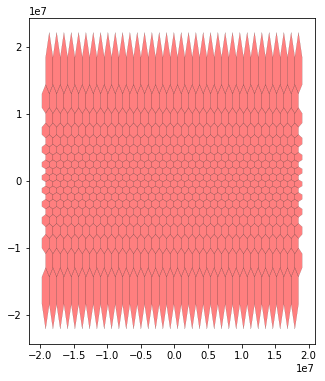

In [29]:
hexbins_m = hexbins.to_crs(epsg=3857)
hexbins_m.plot(linewidth=0.1, facecolor='r', figsize=(12,6))

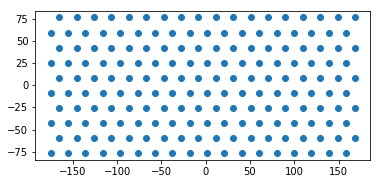

In [3]:
xy = make_centers()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot(xy[0], xy[1], marker='o', linestyle='None')